In [ ]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [9]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [34]:
print(X_train[3])

[3.  0.5]


[]

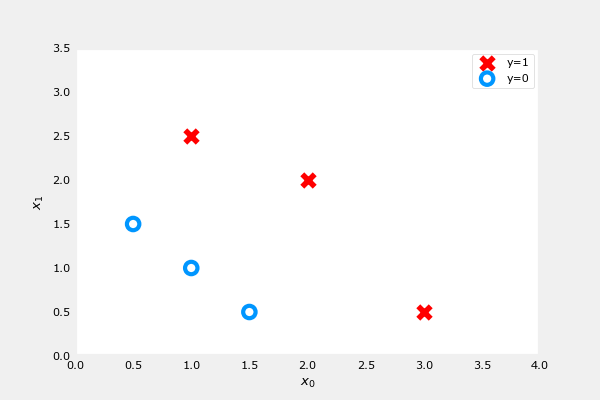

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.plot()

In [11]:
m = X_train.shape[0]
n = X_train.shape[1]
i, j = X_train.shape
print(m, n, i, j)

6 2 6 2


In [38]:
g_z = sigmoid(X_train[1]*np.array([2.,3.]) + 1.)
g_z

array([0.95, 0.98])

In [59]:
def compute_gradient_logistic(X, y, w, b):
    row, col = X.shape
    dj_dw = np.zeros((col,))
    dj_db = 0.0
    for i in range(row):
        f_wb_i = sigmoid(np.dot(X[i],w)+ b)
        err_i = f_wb_i - y[i]
        for j in range(col):
            dj_dw[j] += err_i * X[i,j]
        dj_db += err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [60]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [69]:
import copy
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
def gradient_descent(X, y, w_in, b_in, alpha, num_iter):
    b = b_in
    w = copy.deepcopy(w_in)
    J_history = []
    for i in range(num_iter):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 10000:
            J_history.append(compute_cost_logistic(X, y, w, b))

        if i % 1000 == 0:
            print(f"Iteration {i:5d}: Cost {J_history[-1]}")

    return w, b, J_history

In [70]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration     0: Cost 0.684610468560574
Iteration  1000: Cost 0.1590977666870457
Iteration  2000: Cost 0.08460064176930078
Iteration  3000: Cost 0.05705327279402531
Iteration  4000: Cost 0.04290759421682
Iteration  5000: Cost 0.03433847729884557
Iteration  6000: Cost 0.02860379802212006
Iteration  7000: Cost 0.02450156960879306
Iteration  8000: Cost 0.02142370332569295
Iteration  9000: Cost 0.019030137124109114

updated parameters: w:[5.28 5.08], b:-14.222409982019837
